In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
train_datagen = ImageDataGenerator(rescale=1./255,zoom_range=0.2,horizontal_flip=True, vertical_flip=False)

In [4]:
test_datagen= ImageDataGenerator(rescale=1./255)

In [5]:
x_train = train_datagen.flow_from_directory(r"/content/drive/MyDrive/IBM/Car damage/body/training",target_size=(100,100),class_mode='categorical',batch_size=75)

Found 979 images belonging to 3 classes.


In [6]:
x_test = test_datagen.flow_from_directory(r"/content/drive/MyDrive/IBM/Car damage/body/validation",target_size=(100,100),class_mode='categorical',batch_size=75)

Found 171 images belonging to 3 classes.


In [7]:
x_train.class_indices

{'00-front': 0, '01-rear': 1, '02-side': 2}

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Convolution2D, MaxPooling2D, Flatten

In [10]:
model = Sequential()

In [11]:
model.add(Convolution2D(32, (3,3), input_shape=(100,100,3),activation = 'relu')) #Feature map

In [12]:
model.add(MaxPooling2D(pool_size = (2,2))) #Pooled matrix

In [13]:
model.add(Flatten())

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 98, 98, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 49, 49, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 76832)             0         
                                                                 
Total params: 896
Trainable params: 896
Non-trainable params: 0
_________________________________________________________________


In [15]:
model.add(Dense(512,activation='relu'))
model.add(Dense(256,activation='relu'))

In [16]:
model.add(Dense(26,activation='softmax'))

In [17]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [18]:
len(x_train)

14

In [19]:
len(x_test)

3

In [ ]:
model.fit_generator(x_train, steps_per_epoch=len(x_train), validation_data=x_test, validation_steps=len(x_test),epochs=5)

In [23]:
model.save('body.h5')

In [21]:
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [24]:
model=load_model('body.h5')

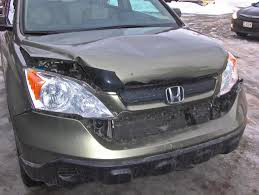

In [25]:
img=image.load_img(r'/content/drive/MyDrive/IBM/Car damage/body/training/00-front/0008.jpeg')
img